In [23]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_excel(r"Rotten_Tomatoes_Movies3.xls")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

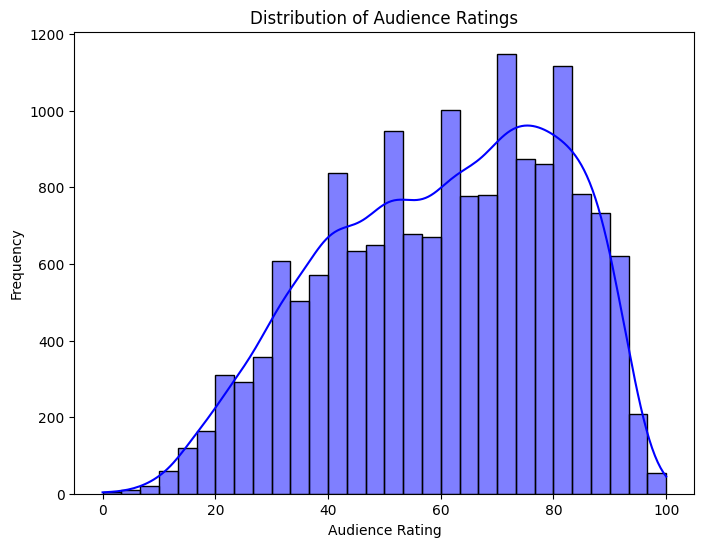

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data['audience_rating'], kde=True, bins=30, color='blue')
plt.title("Distribution of Audience Ratings")
plt.xlabel("Audience Rating")
plt.ylabel("Frequency")
plt.show()


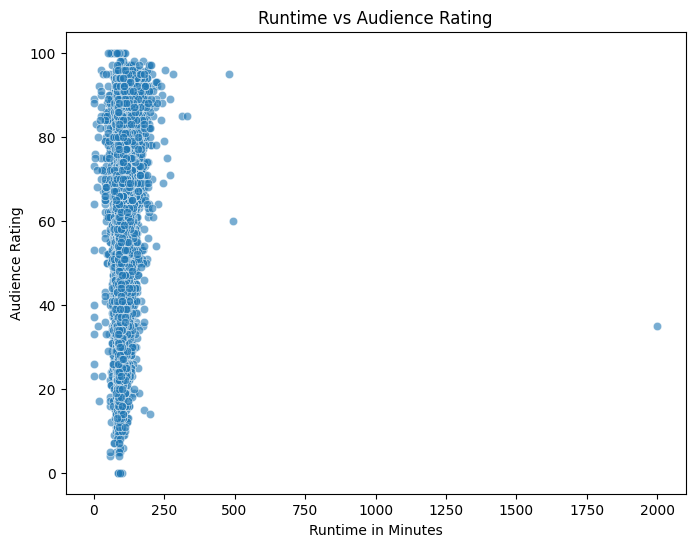

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['runtime_in_minutes'], y=data['audience_rating'], alpha=0.6)
plt.title("Runtime vs Audience Rating")
plt.xlabel("Runtime in Minutes")
plt.ylabel("Audience Rating")
plt.show()

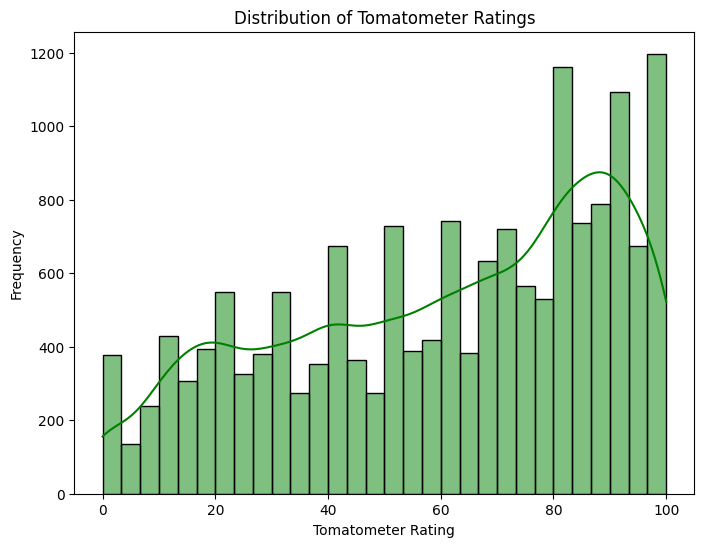

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data['tomatometer_rating'], kde=True, bins=30, color='green')
plt.title("Distribution of Tomatometer Ratings")
plt.xlabel("Tomatometer Rating")
plt.ylabel("Frequency")
plt.show()


In [11]:
data = data.dropna(subset=['audience_rating'])
X = data.drop(['audience_rating', 'movie_title'], axis=1)
y = data['audience_rating']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
numeric_features = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count']
categorical_features = ['rating', 'genre', 'directors', 'studio_name', 'tomatometer_status']

In [16]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['runtime_in_minutes',
                                                   'tomatometer_rating',
                                                   'tomatometer_count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['rating', 'genre',
                                                   'directors', 'studio_name',
                                                   'tomatometer_status'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [30]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 214.5472770896888
R-squared: 0.48015644119030587


In [20]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved as 'model.pkl'")


Model saved as 'model.pkl'
